# Valuing Stocks with Discounted Earnings
Disclaimer: None of the following is financial advice, it is for educational purposes only. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
plt.style.use('seaborn')


## Gathering Stock Information from Yahoo Finance
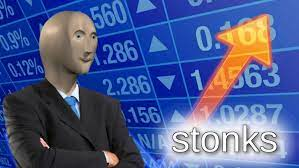

Things to consider about the Discounted Earnings method: 
- It is primarly geared towards equity investors. 
- If earnings estimates are wrong, the model is wrong.
- This particular model considers the market beta, a risk based indicator dirived from the stock's volitity. Companies discount rates are different based on their beta value, with riskier companies' earnings discounted at a higher rate


In [2]:
security = 'k'
market_risk_premium = 0.10
perpetual_rate = 0.02
stock = yf.Ticker(security)
today = datetime.now().date().strftime("%Y-%m-%d")

In [3]:
try:
    company_name = stock.info['shortName']
except KeyError: 
    company_name = security
    growth_rate = 'NaN'
    capm = 'NaN'
    value = 'NaN'
    share_price = 'NaN'
    value_price = 'NaN'
    margin_of_saftey = 'NaN'
    
    
try:
    num_shares = stock.info['sharesOutstanding']
except KeyError: 
    num_shares = 1
share_price = stock.history(today)['Close'][0]
income_statement = stock.financials
cash_flow = stock.cashflow
balance_sheet = stock.balancesheet
growth_rate = stock.analysis['Growth']['+5Y'] # note that terminal growth rate is based on analyst's estimate of a 5yr growth rate

## Forecasting Net Income

In [4]:
## to calculate net income from the financial statements
net_income = income_statement.loc['Net Income Applicable To Common Shares']
display(net_income)


2021-01-02    1.251e+09
2019-12-28      9.6e+08
2018-12-29    1.336e+09
2017-12-30    1.254e+09
Name: Net Income Applicable To Common Shares, dtype: object

In [5]:
# calculating CAPM
beta = stock.info['beta']
today = datetime.now().date().strftime("%Y-%m-%d")
risk_free_rate = yf.Ticker('^IRX').history(today)['Close'][0] / 100
capm = risk_free_rate + (beta * market_risk_premium)
print('CAPM is {:.2f}%'.format(capm*100))

CAPM is 6.12%


In [6]:
## estimating future earnings
years = [1, 2, 3, 4, 5]
future_income = []
discounted_income = []
for year in years:
    income = net_income[0] * ((1 + growth_rate) ** year)
    future_income.append(income)
    disc_income = income / ((1 + capm) ** year)
    discounted_income.append(disc_income)

# calculating terminal value
terminal_value = future_income[-1] * (1+growth_rate)/(capm - perpetual_rate)
discounted_terminal_value = terminal_value / ((1 + capm) ** years[-1])

# adding it all together
value = sum(discounted_income) + discounted_terminal_value
value_price = value / num_shares

print('Year five net income is ${:.2f}'.format(future_income[-1]))
print('The terminal value is ${:.2f}'.format(terminal_value))
print('The estimated intrinsic value of ' + company_name + ' is ${:.2f}'.format(value))
print('This amounts to ${:.2f}'.format(value_price) + ' per share.')
print('The stock is currently trading at ${:.2f}'.format(share_price) + ' per share.')

Year five net income is $1460842755.72
The terminal value is $36544185811.92
The estimated intrinsic value of Kellogg Company is $32898026055.39
This amounts to $96.44 per share.
The stock is currently trading at $66.13 per share.
